In [24]:
# import modules
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib import rc
from matplotlib import colors
import pandas as pd
import math
%matplotlib inline

In [30]:
#Customise figure style 
rc('font',**{'family':'sans-serif','sans-serif':['Arial']})
rc('font',size=12)
rc('ytick.major',pad=5)
rc('xtick.major',pad=5)
padding = 8

#ColourMap
ColourMap = cm.viridis

In [38]:
#load measured data files 

#First site - Bideford 
#measured CRN data
CRNFile = "/home/jrs17/Dakota_Results/CB_CRN.data"
#measured topo file
ExProfileName = "/home/jrs17/Dakota_Results/CB_profile.txt"

#Second site - Scalby
#measured CRN data
CRNFile2 = "/home/jrs17/Dakota_Results/SY_CRN.data"
#measured topo file 
ExProfileName2 = "/home/jrs17/Dakota_Results/SY_profile.txt"

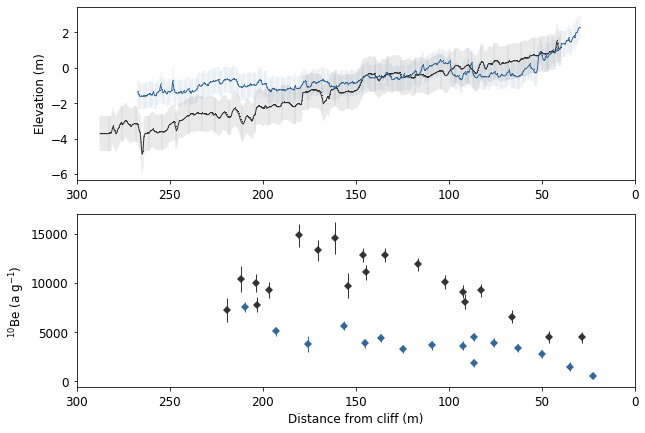

<Figure size 432x288 with 0 Axes>

In [39]:
#set up figure
fig1 = plt.figure(1)
fig1.set_size_inches(10, 7)

#axis
ax1 = plt.subplot(211)
ax2 = plt.subplot(212)

##############
#Plot Bideford data
#measured CRN data 
#CRNFile = "/home/jrs17/Dakota_Results/CB_CRN.data"
X,CRN,Error=np.loadtxt(CRNFile,unpack=True,skiprows=1,usecols=(1,2,3),delimiter=" ")
#Normalised x positions
NormalisedX = -1*(0 - X)
#plot measured CRN 
ax2.errorbar(NormalisedX,CRN,fmt='D',ms=5,mew=0,yerr=Error,color=(0.2, 0.2, 0.2, 1),lw=1,label='St Margarets $^{10}$Be')

#measured shore profile 
#ExProfileName = "/home/jrs17/Dakota_Results/CB_profile.txt" #Swath_Profile_SY.txt"   #CB_profile.txt"
Xprof, Zprof = np.loadtxt(ExProfileName,unpack=True,skiprows=1,usecols=(0,1))
#Normalised x positions
Xprof = -1*(0 - Xprof)
#plot measured topo
ax1.plot(Xprof,Zprof,color=(0.2, 0.2, 0.2, 1),lw=1,label='St Margarets Morphology')
ax1.errorbar(Xprof,Zprof,fmt=',',yerr=1,color=(0.2,0.2,0.2,1),lw=0.1)
#################

#################
#plot scalby data 
#measured CRN data 
#CRNFile2 = "/home/jrs17/Dakota_Results/SY_CRN.data"
X2,CRN2,Error2=np.loadtxt(CRNFile2,unpack=True,skiprows=1,usecols=(1,2,3),delimiter=" ")
#Normalised x positions
NormalisedX2 = -1*(0 - X2)
#plot measured CRN
ax2.errorbar(NormalisedX2,CRN2,fmt='D',ms=5,mew=0,yerr=Error2,color=(0.2, 0.4, 0.6, 1),lw=1,label='Scalby $^{10}$Be')  #y = $3^{-0.001x}$'

#measured shore profile 
#ExProfileName2 = "/home/jrs17/Dakota_Results/SY_profile.txt" #Swath_Profile_SY.txt"   #CB_profile.txt"
Xprof2, Zprof2 = np.loadtxt(ExProfileName2,unpack=True,skiprows=1,usecols=(0,1))
#normalise x positions
Xprof2 = -1*(0 - Xprof2)
#plot measured topo
ax1.plot(Xprof2,Zprof2,color=(0.2, 0.4, 0.6, 1),lw=1,label='Scalby Morphology')
ax1.errorbar(Xprof2,Zprof2,fmt=',',yerr=0.73,color=(0.2,0.4,0.6,1),lw=0.1)
##################

##################
#figure options
#axis labels
ax1.set_ylabel("Elevation (m)")
ax2.set_ylabel("$^{10}$Be (a g$^{-1}$)")
ax2.set_xlabel("Distance from cliff (m)")

#ax1.legend(loc='lower right') #, numpoint=1)
#ax2.legend(loc='center left') #, numpoint=1)

#axis limits
#xmin, xmax = ax1.get_xlim()
ax1.set_xlim(300,0)
ax2.set_xlim(300,0)
#ax1.set_ylim(-10,5)
#ax2.set_ylim(0,16000)

#plot and save figure
fig1 = plt.gcf()
plt.show()
plt.draw()
#fig1.savefig('StMarg_InitialData.png',dpi=300)
#fig1.savefig('Data_plot.svg',dpi=300)
###################

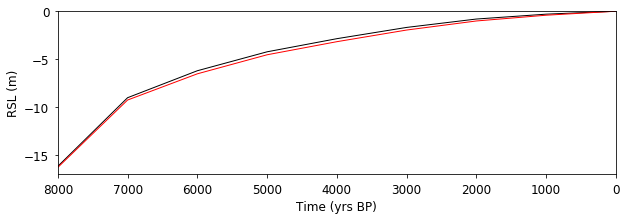

<Figure size 432x288 with 0 Axes>

In [41]:
#####################
#plot RSL 

#figure set up 
fig1 = plt.figure(1)
#plt.figure(1,figsize=(5,3))
fig1.set_size_inches(10, 3)
ax1 = plt.subplot(111)

#RSL rate fiole
#RSLFile = "/home/jrs17/plotting/SY_RSL_rate.data"
#Time,RSL,change,rate=np.loadtxt(RSLFile,unpack=True,skiprows=1,usecols=(0,1,2,3),delimiter=" ")

#RSL file
RSLFile = "/home/jrs17/plotting/SY_RSL_rate.data"
Time,RSL=np.loadtxt(RSLFile,unpack=True,skiprows=1,usecols=(0,1),delimiter=" ")
#plot site 1 RSL
ax1.plot(Time,RSL,color=(0., 0., 0., 1),lw=1,label='RSL St Marg')
#ax1.plot(Time,rate,color=(0., 0., 0., 1),lw=1,label='RSL St Marg') 

#second RSL file 
RSLFile2 = "/home/jrs17/plotting/CB_RSL_rate.data"
Time2,RSL2=np.loadtxt(RSLFile2,unpack=True,skiprows=1,usecols=(0,1),delimiter=" ")
#plot site 2 RSL
ax1.plot(Time2,RSL2,color=(1, 0., 0., 1),lw=1,label='RSL St Marg')

#figrue options
#axis limits
ax1.set_xlim(8000,0)
ax1.set_ylim(-17,0)
#ax1.set_ylim(0.12,0.02)

#labels 
ax1.set_ylabel("RSL (m)")
ax1.set_xlabel("Time (yrs BP)")

#plot and save fig
fig1 = plt.gcf()
plt.show()
plt.draw()
#fig1.savefig('SY_RSL_2700.png',dpi=300)
#fig1.savefig('Data_RR.svg',dpi=300)
###################